<a href="https://colab.research.google.com/github/PrathamSoni4473/Machine-Learning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz

In [ ]:
df = pd.read_csv('salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [ ]:
df.shape

(16, 4)

In [ ]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
input = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']

#Encoding categorical data using label encoding
le = LabelEncoder()

input['company'] = le.fit_transform(input['company'])
input['job'] = le.fit_transform(input['job'])
input['degree'] = le.fit_transform(input['degree'])
input.head()

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [ ]:
model = tree.DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(input,target,random_state=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print('Testing Score : ',accuracy_score(y_test,y_pred))
print('Training score :',accuracy_score(y_train,model.predict(x_train)))

Testing Score :  0.5
Training score : 1.0


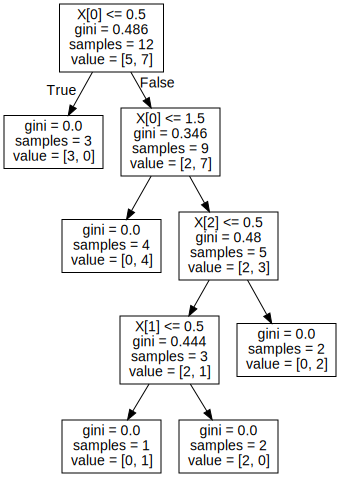

In [ ]:

# DOT data
dot_data = tree.export_graphviz(model)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph